In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


In [2]:
data=pd.read_csv('CarPrice_Assignment.csv')

In [3]:
x=data[['enginesize','horsepower','citympg','highwaympg']]
y=data['price']

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
s=StandardScaler()
x_train_s=s.fit_transform(x_train)
x_test_s=s.transform(x_test)

In [6]:
lr=LinearRegression()
lr.fit(x_train_s,y_train)
y_pred=lr.predict(x_test_s)

In [7]:
print('Name: Athreya A')
print('Reg No:212225240016')
print('MODEL COEFFICIENTS')
for feature,coef in zip(x.columns,lr.coef_):
    print(feature,coef)
print(f"Intercept : {lr.intercept_}")

Name: Athreya A
Reg No:212225240016
MODEL COEFFICIENTS
enginesize 4523.404901011966
horsepower 1694.2232554525806
citympg -392.5731841571549
highwaympg -816.3577991826088
Intercept : 13223.414634146342


In [8]:
print('MODEL PERFORMANCE')
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('R squ:',r2_score(y_test,y_pred))

MODEL PERFORMANCE
MSE: 16471505.900042146
RMSE: 4058.5103055237087
MAE: 2892.628134137953
R squ: 0.7913520781370976


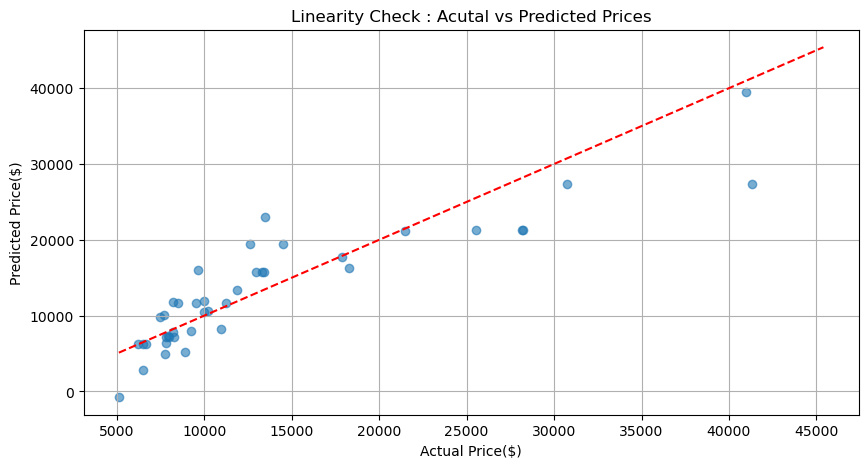

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred,alpha=0.6)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--')
plt.title('Linearity Check : Acutal vs Predicted Prices')
plt.xlabel('Actual Price($)')
plt.ylabel('Predicted Price($)')
plt.grid(True)
plt.show()

In [15]:
residuals=y_test-y_pred
dw_test=sm.stats.durbin_watson(residuals)
print(f"\nDurbin-Watson Statistic: {dw_test:.2f}","\n(Value close to 2 indicates no autocorrelation)")


Durbin-Watson Statistic: 2.28 
(Value close to 2 indicates no autocorrelation)


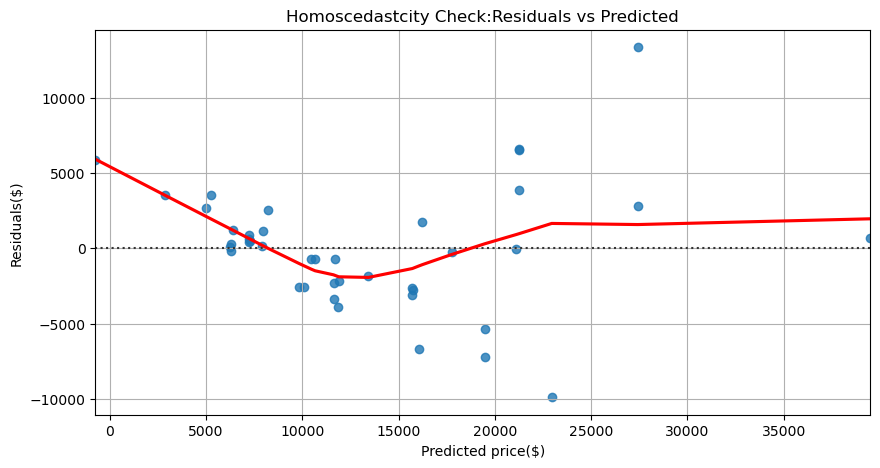

In [20]:
plt.figure(figsize=(10,5))
sns.residplot(x=y_pred,y=residuals,lowess=True,line_kws={'color':'red'})
plt.title("Homoscedastcity Check:Residuals vs Predicted")
plt.xlabel("Predicted price($)")
plt.ylabel("Residuals($)")
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Q-Q Plot')

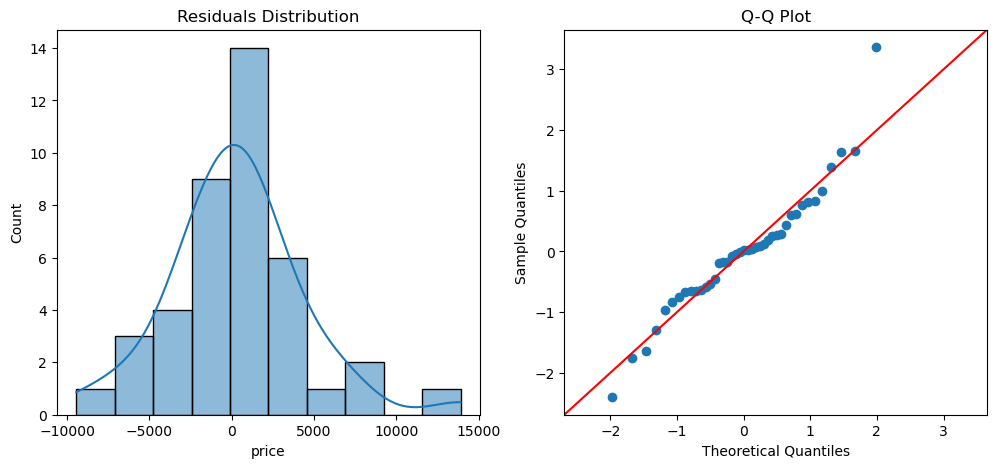

In [23]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.histplot(residuals,kde=True,ax=ax1)
ax1.set_title("Residuals Distribution")
sm.qqplot(residuals,line='45',fit=True,ax=ax2)
ax2.set_title("Q-Q Plot")